# Изучение рынка заведений общественного питания Москвы

- Автор: Мулашкина Татьяна
- Дата: 11.04.2025

### Цели и задачи проекта

<b>Цель:</b> провести исследовательский анализ рынка заведений общественного питания Москвы. <br> 
<b>Задачи:</b>  <br> 
    1) Познакомиться с данными и изучить общую информацию о них<br> 
    2) Провести предобработку <br>
    3) Провести исследовательский анализ данных <br>
    4) По результатам проведённого исследовательского анализа данных сформулировать итоговый вывод и рекомендации для заказчика.

### Описание данных

#### Файл <b> /datasets/rest_info.csv </b> содержит информацию о заведениях общественного питания: <br>
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- seats — количество посадочных мест. 
#### Файл <b> /datasets/rest_price.csv </b> содержит информацию о среднем чеке в заведениях общественного питания: <br>
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: <br>
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
    - и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца - avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт..

### Содержимое проекта
1) Загрузка данных и знакомство с ними:
- проверка корректности типов данных
- объединение двух датасетов в один
2) Предобработка данных
- проверка на наличие пропусков и работа с ними
- проверка наличия явных и неявных дубликатов
- создания нового столбца, содержащего информацию о том работает ли заведение ежедневно и круглосуточно
3) Ислледовательский анализ:
- Изучение категорий заведений и количества заведений в каждой категории
- Изучение районов, количества заведений в каждом районе и распределения заведений каждой категорий в центральном административном районе
- Изучение соотношения сетевых и несетевых заведений в целом и по категориям
- Анализ количества посадочных мест в заведениях
- Анализ рейтинга заведений в целом и по категориям
- Поиск корреляций между рейтингом заведения и другими признаками заведения
- Поиск топ-15 сетевых заведений по популярности и их анализ
- Анализ среднего чека в заведения в зависимости от района
4) Выводы и рекомендации по поделанному исследовательскому анализу
---

In [1]:
!pip install phik -U

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

## 1. Загрузка данных и знакомство с ними

- Загрузка данных о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [3]:
df_info = pd.read_csv('rest_info.csv')
df_price = pd.read_csv('rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
df_info.info()
df_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
df_price.info()
df_price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод

#### В датасете <b>rest_info</b>: 
- содержится 8406 строк и 8 колонок,
- названия колонок приведены к snake case,
- пропуски наблюдаются в таких данных как: дни и часы работы (hours) и количество посадочных мест (seats),
- использование типа данных float64 для количества посадочных мест кажется странным, так как эта величина не может быть дробной,
- так же возможно оптимизировать использование типов данных для колонок raiting (float64) и chain (int64).
#### В датасете <b>rest_price</b>:
- 4058 строк и 5 колонок,
- названия колонок приведены к snake case,
- во всех колонках, кроме id содержатся пропуски.

### Подготовка единого датафрейма

- Объединение данных двух датасетов в один, с которым продолжим работу. Использовано объединени типа left join, чтобы не потерять данные о заведениях

In [6]:
df = pd.merge(df_info, df_price, on = 'id', how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Проведем оптимизацию типов данных в колонках chain и rating. А также изменим тип данных о количестве посадочных мест в заведения (setas) с float на int, при этом пропуски заменим на 0, при этом сохраним эти данные в отдельный столбец.

In [8]:
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df['rating'] = pd.to_numeric(df['rating'], downcast='float') 
df['seats_with0'] =  pd.to_numeric(df['seats'].fillna(0), downcast='integer', errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  seats_with0        8406 non-null   int16  
dtypes: float32(1), float64(3), int16(1), int8(1), object(8)
memory usage: 845.5+ KB


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [9]:
temp = df.copy() 
len(temp)

8406

In [10]:
print('Количество пропусков в каждом стобце в абсолютных значениях')
print(df.isna().sum())
print('Количество пропусков в каждом стобце в долях')
print(df.isna().mean())

Количество пропусков в каждом стобце в абсолютных значениях
id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
seats_with0             0
dtype: int64
Количество пропусков в каждом стобце в долях
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
seats_with0          0.000000
dtype: float64


In [11]:
import pandas as pd        # Импортируем билиотеку (вдруг она не установлена в окружении)
tmp = df.copy()           # Делаем копию текущего датасета
missing = (pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(), 'Доля пропусков': tmp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,536,0.063800
rating,0,0.000000
chain,0,0.000000
seats,3611,0.429600
price,5091,0.605600


- Пропуски наблюдаются в колонках о днях и часах работы (hours), о категории цен (price), среднем чеке (avg_bill, middle_avg_bill, middle_coffee_cup). 
- Доля пропусков более 2% в каждой колонке, поэтому их удаление может привезти к искажению данных. 
- Пропуски в данных о режиме работы заведений может быть связаны с техническими задержками и проблемами обновления данных при добавлении их в ЯндексКарты, у организации нет подтвержденного аккаунта в Яндекс.Бизнесе. В этих данных заменими пропуски на "неизвестно"
- Пропуски в middle_coffee_cup и middle_avg_bill связаны с тем, что не для всех заведений в avg_bill указаны средний чек и средний чек чашки капучино 
- Пропуски в price могут быть связаны с пропусками в middle_avg_bill. Если неизвестен средний чек, то категоризовать заведение по цене не возможно.
- Оставим пропуск в price, avg_bill, middle_coffee_cup и middle_avg_bill без изменений
- Также пропуски наблюдались в колонке seats, которые были заменены на 0

In [12]:
df['hours'] = df['hours'].fillna('неизвестно')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  seats_with0        8406 non-null   int16  
dtypes: float32(1), float64(3), int16(1), int8(1), object(8)
memory usage: 845.5+ KB


- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [13]:
#Приведем названия заведения к нижнему регистру, чтобы избежать неявных дубликатов
df['name'] = df['name'].str.lower()
#Проверим уникальные значения данных в категориальных колонках
print('Количество уникальных значений для названия заведения:')
print(len(df['name'].unique()))
print('Уникальные значения для категории заведения:')
print(df['category'].unique())
print('Количество уникальных значений для адреса:')
print(len(df['address'].unique()))
print('Уникальные значения для адрес:')
print(df['address'].unique())
print('Уникальные значения для района:')
print(df['district'].unique())
print('Уникальные значения для chain:')
print(df['chain'].unique())
print('Уникальные значения для категорий цены:')
print(df['price'].unique())

Количество уникальных значений для названия заведения:
5512
Уникальные значения для категории заведения:
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']
Количество уникальных значений для адреса:
5753
Уникальные значения для адрес:
['Москва, улица Дыбенко, 7/1' 'Москва, улица Дыбенко, 36, корп. 1'
 'Москва, Клязьминская улица, 15' ...
 'Москва, улица Лобачевского, 52, корп. 1'
 'Москва, Болотниковская улица, 52, корп. 2'
 'Москва, Чонгарский бульвар, 26А, корп. 1']
Уникальные значения для района:
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']
Уникальные значения для chain:
[0 1]
Уникальные значения для категорий цены:
[nan 'выше среднего' 'средние' 'высокие

Количество уникальных значений в данных о названии заведений меньше чем количество строк, но это не говорит о том, что это дублирубщиеся данные, так как в данных представлены и сетевые заведения, поэтому названия для них будут повторяться

In [14]:
print(f'Количество полных дубликатов: {df.duplicated().sum()}')
print(f'Количество неявных дубликатов: {df.duplicated(subset=["id"]).sum()}')

Количество полных дубликатов: 0
Количество неявных дубликатов: 0


Приведем к одному регистру названия заведений, тем самым удалим неявные дубликаты:

In [15]:
df['name'] = df['name'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()
print('Количество уникальных значений для названий заведений:')
print(len(df['name'].unique()))
print('Уникальные значения для названий:')
print(df['name'].unique())
print('Количество уникальных значений для адресов заведений:')
print(len(df['address'].unique()))
print('Уникальные значения для адресов:')
print(df['address'].unique())

Количество уникальных значений для названий заведений:
5512
Уникальные значения для названий:
['wowфли' 'четыре комнаты' 'хазри' ... 'миславнес' 'самовар' 'kebab time']
Количество уникальных значений для адресов заведений:
5752
Уникальные значения для адресов:
['москва, улица дыбенко, 7/1' 'москва, улица дыбенко, 36, корп. 1'
 'москва, клязьминская улица, 15' ...
 'москва, улица лобачевского, 52, корп. 1'
 'москва, болотниковская улица, 52, корп. 2'
 'москва, чонгарский бульвар, 26а, корп. 1']


Определим число явных дубликатов по колонкам name и adress

In [16]:
df.duplicated(subset=['name', 'address']).sum()

4

Удалим явные дубликаты по колонкам name и address:

In [17]:
df = df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=False) 
df.info()
df.duplicated(subset=['name', 'address']).sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  seats_with0        8402 non-null   int16  
dtypes: float32(1), float64(3), int16(1), int8(1), object(8)
memory usage: 845.1+ KB


0

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [18]:
df['hours']

0                                  ежедневно, 10:00–22:00
1                                  ежедневно, 10:00–22:00
2       пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...
3                                  ежедневно, 09:00–22:00
4                                  ежедневно, 10:00–22:00
                              ...                        
8401                               ежедневно, 09:00–02:00
8402                               ежедневно, 08:00–22:00
8403                             ежедневно, круглосуточно
8404                             ежедневно, круглосуточно
8405                             ежедневно, круглосуточно
Name: hours, Length: 8402, dtype: object

In [19]:
def is_24_7(x):
    return x == 'ежедневно, круглосуточно'

df['is_24_7'] = df['hours'].apply(is_24_7)  
print(df['is_24_7'].unique())
df.head()

[False  True]


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,seats_with0,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,0,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,4,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,45,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,148,False


In [20]:
# Комментарий ревьюера
df['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

In [21]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


---

### Промежуточный вывод

В ходе предобработки данных:
- тип данных для количества посадочных мест (seats) был приведен из дробного к целочислемму типу данных,
- пропуски в колонке seats были заменены на 0 и сохранены в отдельную колонку,
- были обнаружен пропуски в колонках: по днях и часах работы (hours), о категории цен (price), среднем чеке (avg_bill, middle_avg_bill, middle_coffee_cup). Доля пропусков составляет больше 2%, поэтому данные содержащие пропуски не были удалены,
- пропуски в данных о режиме работы заведения (hours) были заменены на 'неизвестно',
- явные и неявные дубликаты не были обнаружены,
- был создан столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7: логическое значение True — если заведение работает ежедневно и круглосуточно; логическое значение False — в противоположном случае.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [22]:
df.groupby('category')['id'].count()

category
бар,паб             764
булочная            256
быстрое питание     603
кафе               2376
кофейня            1413
пиццерия            633
ресторан           2042
столовая            315
Name: id, dtype: int64

In [23]:
print('Распределение заведений по категориям заведений в относительных значениях:')
df['category'].value_counts(normalize = True)

Распределение заведений по категориям заведений в относительных значениях:


кафе               0.282790
ресторан           0.243037
кофейня            0.168174
бар,паб            0.090931
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: category, dtype: float64

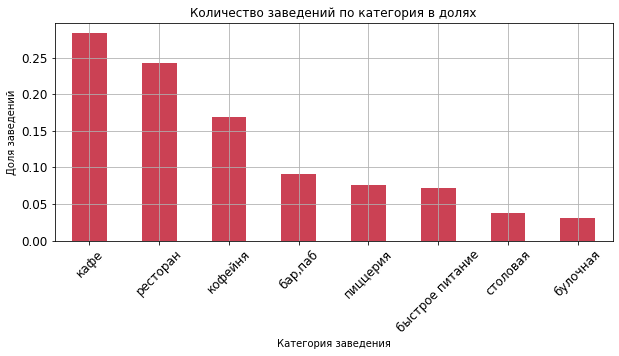

In [24]:
df['category'].value_counts(normalize = True).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Количество заведений по категория в долях',
                                          xlabel = 'Категория заведения',
                                          ylabel = 'Доля заведений', 
                                          rot = 45, 
                                          color = '#cb4154',
                                          grid = True,
                                          fontsize = 12)
plt.show()

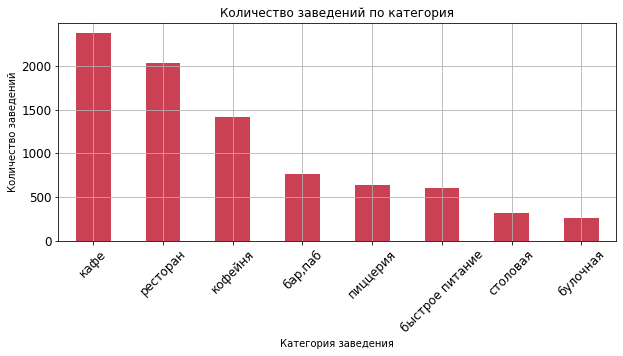

In [25]:
df.groupby('category')['id'].count().sort_values(ascending = False).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Количество заведений по категория',
                                          xlabel = 'Категория заведения',
                                          ylabel = 'Количество заведений', 
                                          rot = 45, 
                                          color = '#cb4154',
                                          grid = True,
                                          fontsize = 12)
plt.show()

- В данных представлены следующие категории заведений: бар,паб, булочная, быстрое питание, кафе, кофейня, пиццерия, ресторан, столовая.
- Наибольшее количество заведений относится к категории 'кафе' (2378 заведений), на втором месте по количеству - рестораны (2043 заведения), на третьем месте находятся кофейни (1413 заведений)
- Наименьшее же количество заведений относится к категориям 'булочная' и 'столовая'

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [26]:
print('Распределение заведений по районам в абсолютных значениях:')
df.groupby('district')['id'].count().sort_values(ascending = False)

Распределение заведений по районам в абсолютных значениях:


district
Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: id, dtype: int64

In [27]:
print('Распределение заведений по районам в относительных значениях:')
df['district'].value_counts(normalize = True)

Распределение заведений по районам в относительных значениях:


Центральный административный округ         0.266841
Северный административный округ            0.106879
Южный административный округ               0.106165
Северо-Восточный административный округ    0.105927
Западный административный округ            0.101166
Восточный административный округ           0.094977
Юго-Восточный административный округ       0.084980
Юго-Западный административный округ        0.084385
Северо-Западный административный округ     0.048679
Name: district, dtype: float64

In [28]:
print(df['district'].unique())

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


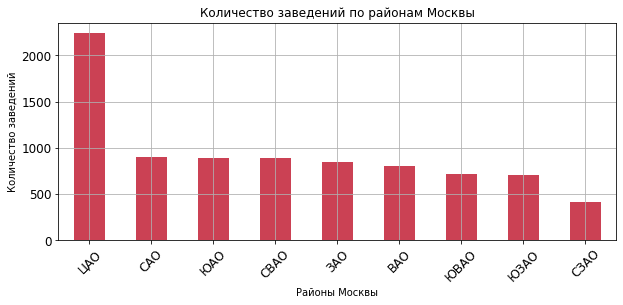

In [29]:
#Для удобства визуализации переименуем районы Москвы на соответсвующие им аббревиатуры
df['district'] = df['district'].replace({'Северный административный округ': 'САО', 
                                            'Северо-Восточный административный округ' : 'СВАО',
                                            'Северо-Западный административный округ': 'СЗАО',
                                            'Западный административный округ': 'ЗАО',
                                            'Центральный административный округ': 'ЦАО',
                                            'Восточный административный округ' : 'ВАО',
                                            'Юго-Восточный административный округ' : 'ЮВАО',
                                            'Южный административный округ' : 'ЮАО',
                                            'Юго-Западный административный округ' : 'ЮЗАО'})
df.groupby('district')['id'].count().sort_values(ascending = False).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Количество заведений по районам Москвы',
                                          xlabel = 'Районы Москвы',
                                          ylabel = 'Количество заведений', 
                                          rot = 45, 
                                          color = '#cb4154',
                                          grid = True,
                                          fontsize = 12)
plt.show()

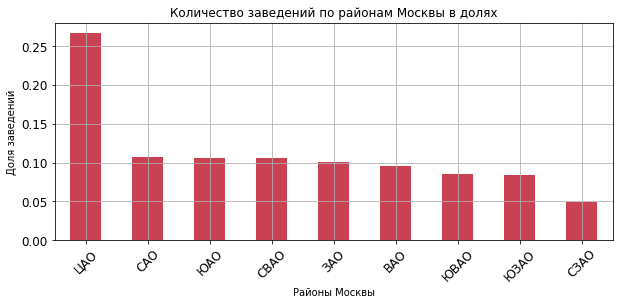

In [30]:
df['district'].value_counts(normalize = True).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Количество заведений по районам Москвы в долях',
                                          xlabel = 'Районы Москвы',
                                          ylabel = 'Доля заведений', 
                                          rot = 45, 
                                          color = '#cb4154',
                                          grid = True,
                                          fontsize = 12)
plt.show()

In [31]:
df_CAO = df[df['district'] == 'ЦАО']
print('Распределение заведений по категориям в районе ЦАО в абсолютных значениях:')
df_CAO.groupby('category')['id'].count().sort_values(ascending = False)

Распределение заведений по категориям в районе ЦАО в абсолютных значениях:


category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

In [32]:
print('Распределение заведений по категориям в районе ЦАО в долях:')
df_CAO['category'].value_counts(normalize = True)

Распределение заведений по категориям в районе ЦАО в долях:


ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: category, dtype: float64

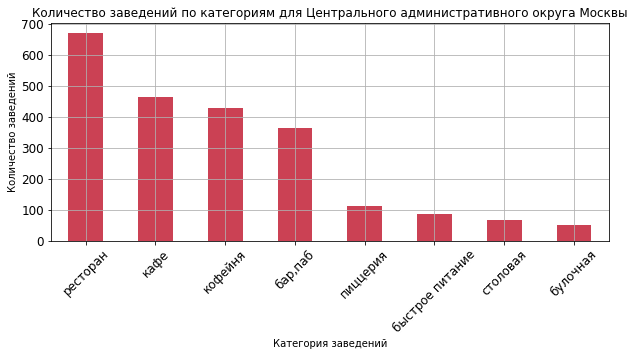

In [33]:
df_CAO = df[df['district'] == 'ЦАО']
df_CAO.groupby('category')['id'].count().sort_values(ascending = False).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Количество заведений по категориям для Центрального административного округа Москвы',
                                          xlabel = 'Категория заведений',
                                          ylabel = 'Количество заведений', 
                                          rot = 45, 
                                          color = '#cb4154',
                                          grid = True,
                                          fontsize = 12)
plt.show()

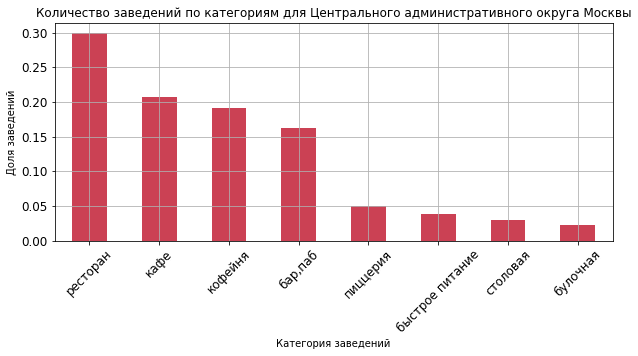

In [34]:
df_CAO['category'].value_counts(normalize = True).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Количество заведений по категориям для Центрального административного округа Москвы',
                                          xlabel = 'Категория заведений',
                                          ylabel = 'Доля заведений', 
                                          rot = 45, 
                                          color = '#cb4154',
                                          grid = True,
                                          fontsize = 12)
plt.show()

- В данных представлены заведения по районам: 'Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ'.
- Наибольшее количество заведений находится в Центральном административном округе, что довольно ожидаемо, так в ЦАО находится множество туристических объектов.
- Наименьшее количество находится в Северо-Западном административном округе.
- В Центральном административном округе наибольшее количество заведений относятся к категории "ресторан", а таких категорий как "булочная", "быстрое питание", "столовая" меньше остальных (менее 100 заведений в каждой категории).

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [35]:
print(df['chain'].unique())
# 0 - не является сетевым
# 1 -является сетевым

[0 1]


Всего заведений: 8402
Количество сетевых заведений: 3203
и их доля от всех заведений: 0.3812
Количество несетевых заведений: 5199
и их доля от всех заведений: 0.6188


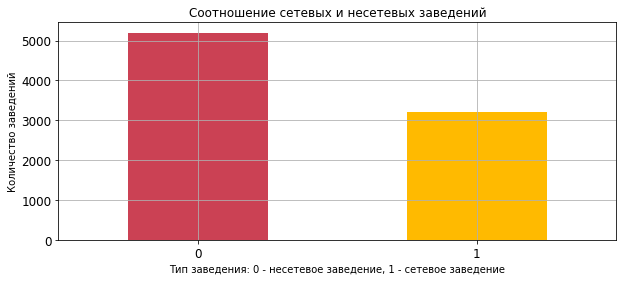

In [36]:
print('Всего заведений:', df['chain'].count())
print('Количество сетевых заведений:', df['chain'].sum())
print('и их доля от всех заведений:', round(df['chain'].sum()/df['chain'].count(), 4))
print('Количество несетевых заведений:', df['chain'].count() - df['chain'].sum())
print('и их доля от всех заведений:', round(1 - df['chain'].sum()/df['chain'].count(), 4))
df.groupby('chain')['id'].count().plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Соотношение сетевых и несетевых заведений',
                                          xlabel = 'Тип заведения: 0 - несетевое заведение, 1 - сетевое заведение',
                                          ylabel = 'Количество заведений', 
                                          rot = 0, 
                                          color = ['#cb4154', '#ffba00'],
                                          grid = True,
                                          fontsize = 12)
plt.show()

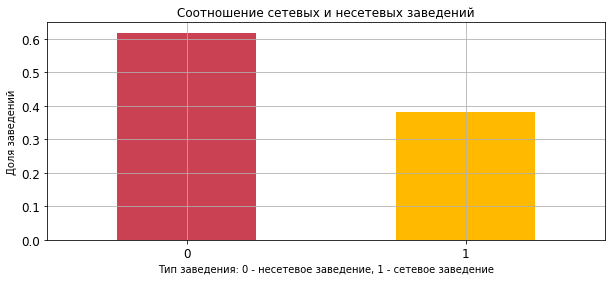

In [37]:
df['chain'].value_counts(normalize = True).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Соотношение сетевых и несетевых заведений',
                                          xlabel = 'Тип заведения: 0 - несетевое заведение, 1 - сетевое заведение',
                                          ylabel = 'Доля заведений', 
                                          rot = 0, 
                                          color = ['#cb4154', '#ffba00'],
                                          grid = True,
                                          fontsize = 12)
plt.show()

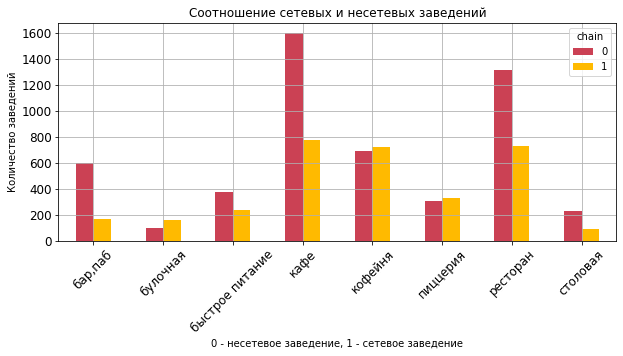

In [38]:
df.groupby(['category', 'chain'])['id'].count().unstack(fill_value=0).plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Соотношение сетевых и несетевых заведений',
                                          xlabel = '0 - несетевое заведение, 1 - сетевое заведение',
                                          ylabel = 'Количество заведений', 
                                          rot = 45, 
                                          grid = True,
                                          color = ['#cb4154', '#ffba00'],                                
                                          fontsize = 12)
plt.show()

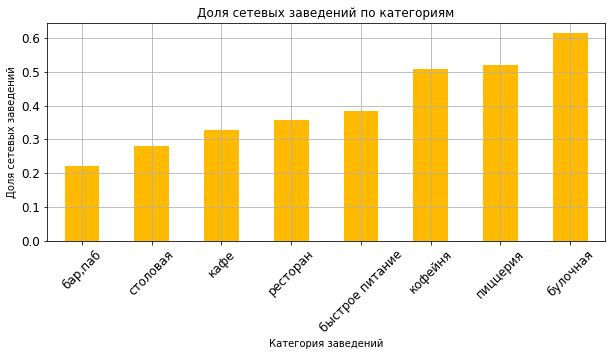

In [39]:
df.groupby(['category'])['chain'].mean().sort_values().plot(kind = 'bar', 
                                          figsize = (10, 4), 
                                          title = f'Доля сетевых заведений по категориям',
                                          xlabel = 'Категория заведений',
                                          ylabel = 'Доля сетевых заведений', 
                                          rot = 45, 
                                          grid = True,
                                          color = '#ffba00',                                
                                          fontsize = 12)
plt.show()

- Среди предсатвленных в данных заведений больше несетевых заведений (около 62 процентов заведений).
- Несетевых заведений больше чем сетевых для таких категорий как: бар,паб, быстрое питание, кафе, ресторан и столовая
- Сравнение доли сетевых заведений по их категориям, показало, что булочные, пиццерии и кофейне чаще относятся к сетевым заведениям, чем другие категории

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


В данных наблюдаются минимальные значения 0, которые соответсвуют пропупускам. Поэтому проведем анализ только для значений seats_with0 > 0:

In [40]:
print('Статистические показатели столбца seats:')
df['seats_with0'][df['seats_with0']>0].describe()

Статистические показатели столбца seats:


count    4656.000000
mean      111.526632
std       123.197930
min         1.000000
25%        40.000000
50%        78.000000
75%       141.000000
max      1288.000000
Name: seats_with0, dtype: float64

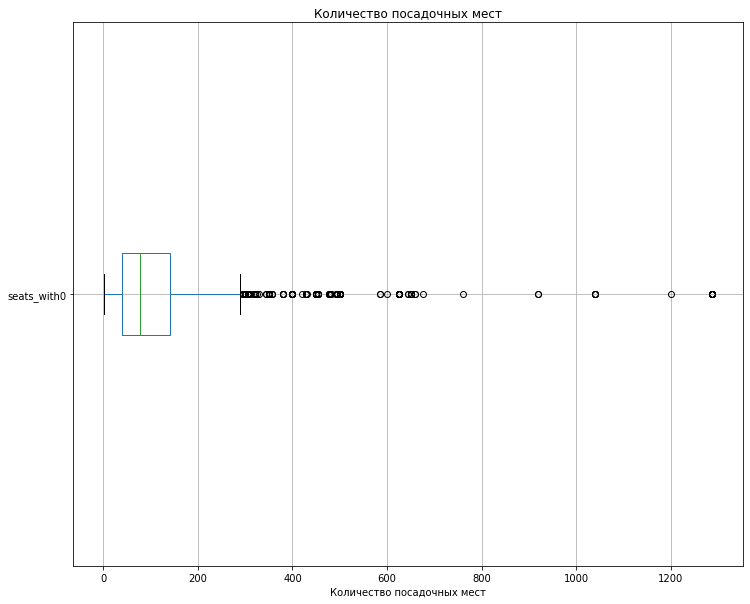

In [41]:
df_seats_without0 = df[df['seats_with0']>0]
df_seats_without0.boxplot(column = 'seats_with0', vert = False, grid = True, figsize = (12, 10))
plt.title('Количество посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.show()

In [42]:
print('Статистические показатели столбца seats:')
df[df['seats_with0'] > 0].groupby('category')['seats_with0'].describe()

Статистические показатели столбца seats:


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",463.0,125.552916,145.324525,6.0,48.0,84.0,150.0,1288.0
булочная,137.0,96.562044,98.062395,3.0,35.0,52.0,130.0,625.0
быстрое питание,331.0,104.268882,106.881229,1.0,36.0,75.0,150.0,1040.0
кафе,1173.0,101.017903,118.568577,1.0,40.0,60.0,120.0,1288.0
кофейня,727.0,114.870702,128.298388,2.0,40.5,80.0,150.0,1288.0
пиццерия,417.0,96.762590,112.652861,1.0,30.0,56.0,120.0,1288.0
ресторан,1249.0,123.843875,123.807033,2.0,49.0,90.0,155.0,1288.0
столовая,159.0,102.886792,123.574555,4.0,40.0,80.0,120.0,1200.0


In [43]:
pivot = df[df['seats_with0'] > 0].pivot_table(values='seats_with0', index='category', aggfunc='median')
pivot_sorted = pivot.sort_values(by='seats_with0', ascending=True)
print('Наиболее типичное количество посадочных мест:')
print(pivot_sorted)

Наиболее типичное количество посадочных мест:
                 seats_with0
category                    
булочная                  52
пиццерия                  56
кафе                      60
быстрое питание           75
кофейня                   80
столовая                  80
бар,паб                   84
ресторан                  90


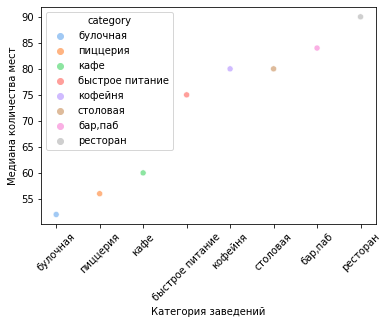

In [44]:
sns.scatterplot(data = pivot_sorted, x="category", y="seats_with0", hue = 'category', palette = 'pastel')
plt.ylabel('Медиана количества мест')
plt.xlabel('Категория заведений')
plt.xticks(rotation=45)
plt.show()

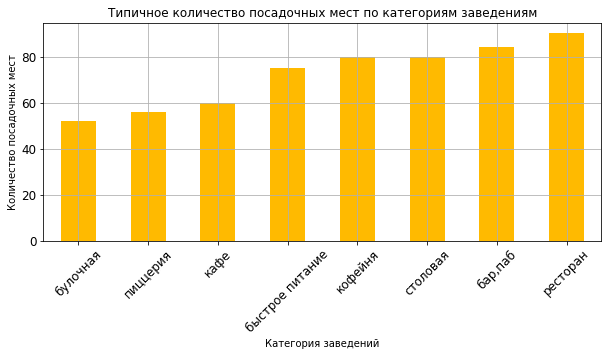

In [45]:
pivot_sorted.plot(kind = 'bar', legend=False,
                                          figsize = (10, 4), 
                                          title = 'Типичное количество посадочных мест по категориям заведениям',
                                          xlabel = 'Категория заведений',
                                          ylabel = 'Количество посадочных мест', 
                                          rot = 45, 
                                          grid = True,
                                          color = '#ffba00',                                
                                          fontsize = 12)
plt.show()

- Среднее значение посадочных мест выше чем медиана, также наблюдается большое стандартное отклонение и большое максимальное значение посадочных мест, что явно говорит о выбросах (аномальных данных), Это также видно на "ящике с усами". 
- Почти для всех типов заведений в данных присутствует количество мест выше 200, что кажется довольно странным. Вряд-ли существуют заведения на 1000 посадочных мест.
- Если смотреть по медиане, то заведения содержат от 52 до 90 посадочных мест
- Наиболее типичное количество посадочных мест для категорий заведений:             
    - булочная          52.0
    - пиццерия          56.0
    - кафе              60.0
    - быстрое питание   75.0
    - кофейня           80.0
    - столовая          80.0
    - бар,паб           84.0
    - ресторан          90.0
- Наибольшее количество посадочных мест наблюдается в заведениях категории ресторан

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [46]:
print('Статистические показатели столбца rating:')
df['rating'].describe()

Статистические показатели столбца rating:


count    8402.000000
mean        4.230016
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [47]:
print('Статистические показатели столбца rating:')
df.groupby('category')['rating'].describe()

Статистические показатели столбца rating:


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124284,0.566001,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413143,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


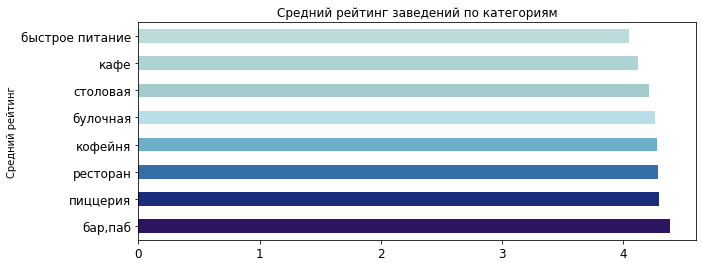

In [48]:
df.groupby('category')['rating'].mean().sort_values(ascending = False).plot(kind = 'barh', figsize = (10, 4), 
                                          title = f'Средний рейтинг заведений по категориям',
                                          ylabel = 'Категория заведений',
                                          xlabel = 'Средний рейтинг', 
                                          rot = 0, 
                                          color = ['#2e1561', '#1c2c7c', '#366ea9', '#6cafca', '#b8dfe8', '#a4cbcc', '#add4d4', '#bcdbdb'],
                                          fontsize = 12)
plt.show()                                     

- Наивысшим средним рейтингом обладают заведения категории "бар,паб".
- Средние рейтинги по категориям заведений не сильно отличаются. Для всех категорий рейтинг в среднем более 4.0

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [49]:
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)


interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


In [50]:
# Комментарий ревьюера
df['seats'].value_counts()[:2]

40.0     253
100.0    213
60.0     175
50.0     168
80.0     160
        ... 
56.0      18
34.0      18
64.0      17
97.0      16
2.0       15
Name: seats, Length: 68, dtype: int64

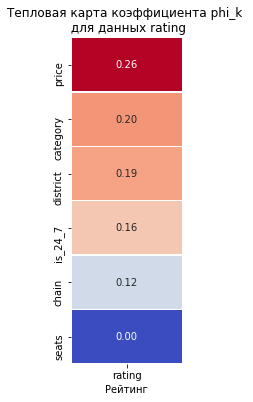

In [51]:
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=False 
           )

plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

plt.show()

In [52]:
pivot = df.pivot_table(values='rating', index='price', aggfunc='mean')
pivot_sorted = pivot.sort_values(by='rating', ascending=True)
print(pivot_sorted)

                 rating
price                  
низкие         4.173077
средние        4.297874
выше среднего  4.386348
высокие        4.436611


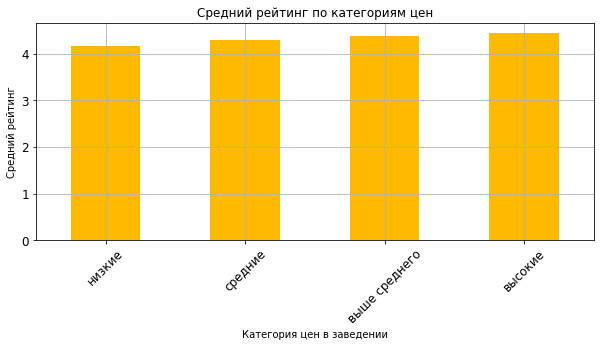

In [53]:
pivot_sorted.plot(kind = 'bar', legend=False,
                                          figsize = (10, 4), 
                                          title = f'Средний рейтинг по категориям цен',
                                          xlabel = 'Категория цен в заведении',
                                          ylabel = 'Средний рейтинг', 
                                          rot = 45, 
                                          grid = True,
                                          color = '#ffba00',                                
                                          fontsize = 12)
plt.show()

- Наиболее сильная корреляции наблюдается между рейтингом заведения и категорией цены.
- Чем "выше" ценовая категория, тем выше рейтинг
- При этом видно, что для категории цен "высокий" и "выше среднего" рейтинг более сконцентрирован между значениями от 3.5 до 5.0, чем для более низких категорий

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [54]:
name_group = df[df['chain'] == 1].groupby(['name', 'category']).agg({'id': 'count', 'rating': 'mean'})
name_group = name_group.sort_values(by = 'id', ascending = False)
name_group = name_group.rename(columns = {'id': 'count'})
name_group.head(15)

,,count,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286487
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114285
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


- Определены топ-15 популярных сетевых заведений в Москве
- Наиболее популярным заведением является "Шоколадница"

In [55]:
name_group = df[df['chain'] == 1].groupby(['name']).agg({'id': 'count', 'rating': 'mean'})
name_group = name_group.sort_values(by = 'id', ascending = False)
name_group = name_group.rename(columns = {'id': 'count'})
name_group.head(15)

,count,rating
name,,
шоколадница,120,4.177500
домино'с пицца,76,4.169737
додо пицца,74,4.286487
one price coffee,71,4.064789
яндекс лавка,69,3.872464
cofix,65,4.075385
prime,50,4.116000
хинкальная,44,4.322727
кофепорт,42,4.147619


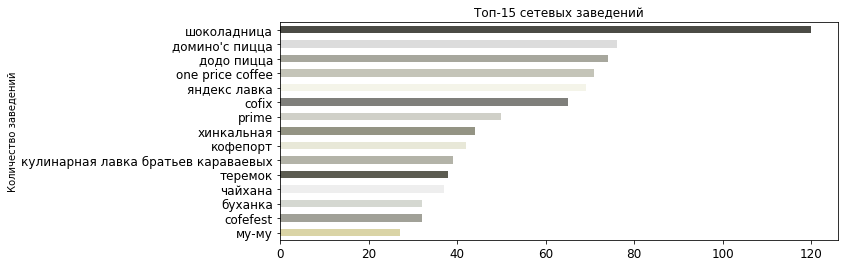

In [56]:
name_group.iloc[0:15]['count'].sort_values().plot(kind = 'barh', figsize = (10, 4), 
                                          title = 'Топ-15 сетевых заведений' ,
                                          ylabel = 'Название заведения',
                                          xlabel = 'Количество заведений', 
                                          rot = 0, 
                                          color = ['#dad4a6', '#a1a198', '#d5d8d1', '#eeeeee', '#5c5c51', '#b3b3a8', '#e8e8d8', '#949484', '#d0d0c8', '#7f7f7b', '#f4f4e9', '#c4c4b8', '#a7a79d', '#dcdcdc', '#4b4b45' ],
                                          fontsize = 12)
plt.show()                                     

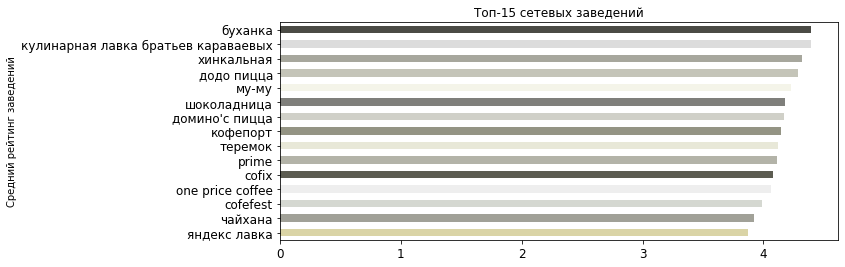

In [57]:
name_group.iloc[0:15]['rating'].sort_values().plot(kind = 'barh', figsize = (10, 4), 
                                          title = 'Топ-15 сетевых заведений' ,
                                          ylabel = 'Название заведения',
                                          xlabel = 'Средний рейтинг заведений', 
                                          rot = 0, 
                                           color = ['#dad4a6', '#a1a198', '#d5d8d1', '#eeeeee', '#5c5c51', '#b3b3a8', '#e8e8d8', '#949484', '#d0d0c8', '#7f7f7b', '#f4f4e9', '#c4c4b8', '#a7a79d', '#dcdcdc', '#4b4b45' ],
                                          fontsize = 12)
plt.show()

- В топ-15 сетевых заведений по популярности входят 6 завдений категории "кофейня", 3 ресторана и 3 кафе, 2 пиццерии и 1 булочная,
- Самым популярным сетевым заведением является "Шоколадница"
- Среди топ-15 сетевых заведений наивысший среднйи рейтинг у заведения "Буханка" (4.41), а наименьший у "Яндекс лавка" (3.87)

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [58]:
df.groupby('district')['middle_avg_bill'].describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
ЦАО,1060.0,1191.057547,920.014707,0.0,500.00,1000.0,1500.0,7250.0
ЗАО,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
САО,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
ЮАО,314.0,834.398089,2008.640596,100.0,350.00,500.0,1037.5,35000.0
СЗАО,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
ВАО,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
ЮЗАО,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
СВАО,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
ЮВАО,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0


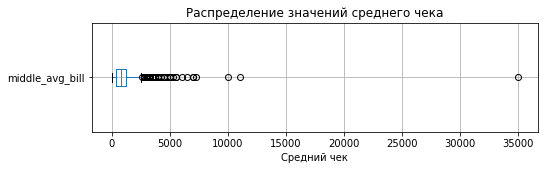

In [59]:
df.boxplot(column = 'middle_avg_bill', vert = False, grid = True, figsize = (8, 2))
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.show()

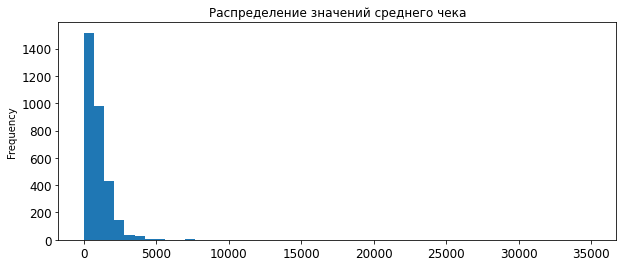

In [60]:
df['middle_avg_bill'].plot(kind = 'hist', figsize = (10, 4), 
                           bins = 50,
                                          title = 'Распределение значений среднего чека' ,
                                          ylabel = 'Частота',
                                          xlabel = 'Средний чек', 
                                          rot = 0, 
                                          fontsize = 12)
plt.show()   

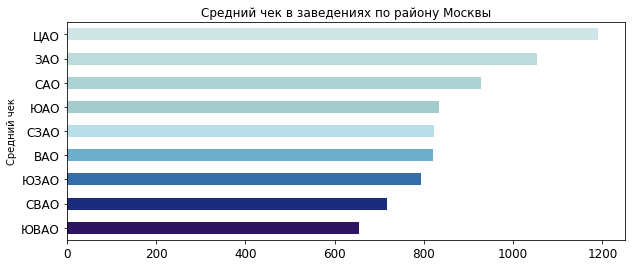

In [61]:
df.groupby('district')['middle_avg_bill'].mean().sort_values().plot(kind = 'barh', figsize = (10, 4), 
                                          title = f'Средний чек в заведениях по району Москвы',
                                          ylabel = 'Район Москвы',
                                          xlabel = 'Средний чек', 
                                          rot = 0, 
                                          color = ['#2e1561', '#1c2c7c', '#366ea9', '#6cafca', '#b8dfe8', '#a4cbcc', '#add4d4', '#bcdbdb', '#cfe5e5', '#e4efef' ],
                                          fontsize = 12)
plt.show()

---


- В центральном административном округе самый высокий средний чек
- Также высокие средние чеки наблюдаются в Западном и Северном административном округе
- Самый низкий средний чек наблюдается для Юго-восточного района Москвы

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Наиболее важные результаты:
1) Наибольшее количество заведений находятся в центральном административном округе
2) Средний чек также наиболее высокий в Центральном административном округе
3) Рейтинг заведений коррелирует с категорией цены, к которой относятся заведения
4) Несетевых заведений заметно больше чем сетевых (примерно в 2 раза)
5) В количестве посадочных мест наблюдаются странные (аномальные значения), поэтому опираться на результаты анализа посадочных мест не стоит, они могут быть искаженны
6) Наибольшее количество заведений относится к категориям 'кафе', 'ресторан' и 'кофейня'
7) А в Центральном административном округе наибольшее количество заведений относятся к категории "ресторан", а таких категорий как "булочная", "быстрое питание", "столовая" меньше остальных (менее 100 заведений в каждой категории).
8) Среди сетесвых заведений наиболее популярным является "Шоколадница", а наивысший среднйи рейтинг среди топ-15 сетевых заведений у булочной "Буханка"

# 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

1. В работе была проведена проверка корректности данных и их типов, а также предобработка данных, включающая в себя объединение датасетов, изменение типа данных в колонке seats, проверка наличие пропусков и их замена, проверка наличия явных и неявных дубликатов.
2. Был проведен исследовательский анализ, из которого следует, что: 
- Средний чек также наиболее высокий в Центральном административном округе
- Рейтинг заведений коррелирует с категорией цены, к которой относятся заведения
- Несетевых заведений заметно больше чем сетевых (примерно в 2 раза)
- В количестве посадочных мест наблюдаются странные (аномальные значения), поэтому опираться на результаты анализа посадочных мест не стоит, они могут быть искаженны
- Наибольшее количество заведений относится к категориям 'кафе', 'ресторан' и 'кофейня'
- А в Центральном административном округе наибольшее количество заведений относятся к категории "ресторан", а таких категорий как "булочная", "быстрое питание", "столовая" меньше остальных (менее 100 заведений в каждой категории).
- Среди сетесвых заведений наиболее популярным является "Шоколадница", а наивысший среднйи рейтинг среди топ-15 сетевых заведений у булочной "Буханка"
3. На основе проденного анализа, можно дать следующие рекомендации:
- В центральном административном округе довольно много заведений по сравнению с остальными, что может привезти к высокой конкуренции. Поэтому чтоит присмотреть к другим районам, где заведений общественно питания меньше и есть потребность в новом заведении
- Так как средний рейтинг заведений положительно коррелирует с категорией цен заведений. Чем "выше" категория, тем выше рейтинг, что вероятно коррелирует с качеством заведения (еда и обслуживание). Поэтому не стоит открывать очень бюджетное заведение. Возможно стоит открыть заведение категории "среднее", "выше среднего"
- Если планируется открытие не сетевого заведения, то стоит обратить свое внимание на такие категории как: кафе, ресторан или бар,паб